In [1]:
from netCDF4 import Dataset
import numpy as np
import os 

datafolder ='Data'
fin = Dataset(os.path.join(datafolder, 'f522_dh.trainingdata_in.lcv.20190401_0000z.nc4'))
fout = Dataset(os.path.join(datafolder, 'f522_dh.trainingdata_out.lcv.20190401_0000z.nc4'))
x = fin.variables
y = fout.variables

for var in x.keys():
    print(var, x[var].shape)
    
n   = x['Xdim'].shape[0]
p   = x['Ydim'].shape[0]
lev = x['lev'].shape[0]

Xdim (720,)
Ydim (4320,)
lons (4320, 720)
lats (4320, 720)
lev (72,)
time (1,)
emis (1, 4320, 720)
fcld (1, 72, 4320, 720)
o3 (1, 72, 4320, 720)
pl (1, 72, 4320, 720)
q (1, 72, 4320, 720)
qi (1, 72, 4320, 720)
ql (1, 72, 4320, 720)
ri (1, 72, 4320, 720)
rl (1, 72, 4320, 720)
t (1, 72, 4320, 720)
ts (1, 4320, 720)


In [4]:
#a=y['flx'][:].mean()
#b=y['flx'][:].std()
a = -216.54587
b = 86.98259

In [103]:
fig = plt.figure()
fig.plt

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

150 1696


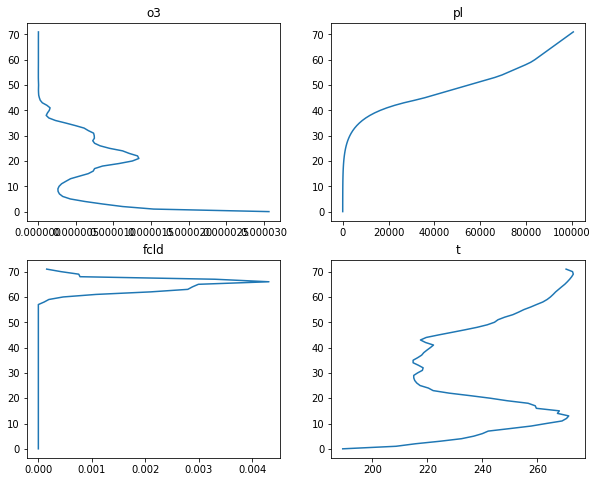

In [233]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import figure

idx = int(np.random.random()*n)
idy = int(np.random.random()*p)
print(idx, idy)

fig = plt.figure( figsize=(10, 8))
ax1 = fig.add_subplot(221)
plt.plot(x["o3"][0,:,idy,idx], np.arange(72)); plt.title("o3")
ax2 = fig.add_subplot(222)
plt.plot(x["pl"][0,:,idy,idx], np.arange(72)); plt.title("pl")
ax3 = fig.add_subplot(223)
plt.plot(x["fcld"][0,:,idy,idx], np.arange(72)); plt.title("fcld")
ax4 = fig.add_subplot(224)
plt.plot(x["t"][0,:,idy,idx], np.arange(72)); plt.title("t")

plt.show()

In [236]:
print(np.max(x['fcld']), np.min(x['fcld']))

1.0 0.0


In [237]:
x['fcld']

<class 'netCDF4._netCDF4.Variable'>
float32 fcld(time, lev, Ydim, Xdim)
    long_name: cloud_fraction_for_radiation
    units: 1
    _FillValue: 1000000000000000.0
    missing_value: 1000000000000000.0
    fmissing_value: 1000000000000000.0
    scale_factor: 1.0
    add_offset: 0.0
    standard_name: cloud_fraction_for_radiation
    vmin: -1000000000000000.0
    vmax: 1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
    coordinates: lons lats
unlimited dimensions: time
current shape = (1, 72, 4320, 720)
filling on

282 621


Text(0.5, 1.0, 'T/P')

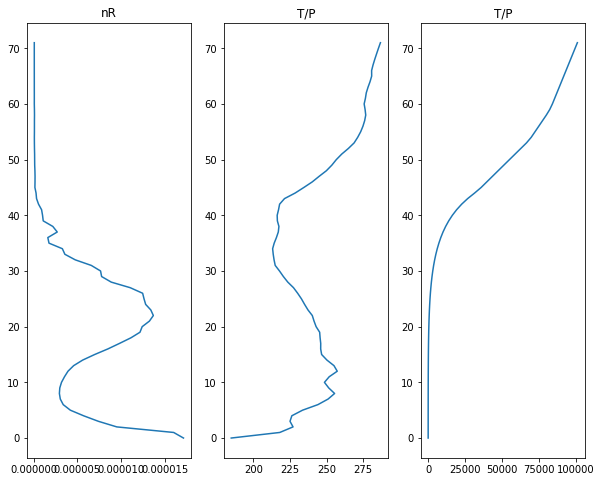

In [297]:
idx = int(np.random.random()*n)
idy = int(np.random.random()*p)
print(idx, idy)
fig = plt.figure( figsize=(10, 8))
ax1 = fig.add_subplot(131)
plt.plot( x["o3"][0,:,idy,idx], np.arange(72)); plt.title("nR")
ax2 = fig.add_subplot(132)
plt.plot(x["t"][0,:,idy,idx], np.arange(72)); plt.title("T/P")
ax3 = fig.add_subplot(133)
plt.plot(x["pl"][0,:,idy,idx], np.arange(72)); plt.title("T/P")

In [123]:
pd.DataFrame(data=data[1:,1:],    # values
              index=data[1:,0],    # 1st column as index
              columns=data[0,1:])  # 1st row as the column names

86.98259

In [222]:
x['t']

<class 'netCDF4._netCDF4.Variable'>
float32 t(time, lev, Ydim, Xdim)
    long_name: air_temperature
    units: K
    _FillValue: 1000000000000000.0
    missing_value: 1000000000000000.0
    fmissing_value: 1000000000000000.0
    scale_factor: 1.0
    add_offset: 0.0
    standard_name: air_temperature
    vmin: -1000000000000000.0
    vmax: 1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
    coordinates: lons lats
unlimited dimensions: time
current shape = (1, 72, 4320, 720)
filling on

### RL, RI analysis :

* They have a hard minimum, we should set it to 0
* They should be rescaled

In [123]:
print(np.min(x["ri"][:]),np.max(x["ri"][:]))
print(np.min(x["rl"][:]),np.max(x["rl"][:]))

1.5e-05 0.00010348039
5e-06 2.1e-05


428 1483


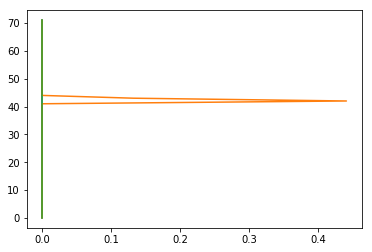

In [262]:
# RL, RI analysis

idx = int(np.random.random()*n)
idy = int(np.random.random()*p)
print(idx,idy)
plt.plot(((x["ri"][0,:,idy,idx]-1.5e-05)/0.0001).T,np.arange(72))
plt.plot((x["fcld"][0,:,idy,idx]).T,np.arange(72))
plt.plot(((x["rl"][0,:,idy,idx]-5e-06)/2.1e-5).T,np.arange(72));

Data Prepross :
   * rl - min(rl) (i.e 1.5e-05)
   * ri - min(ri) (i.e 1.5e-06)

===================

700 1888


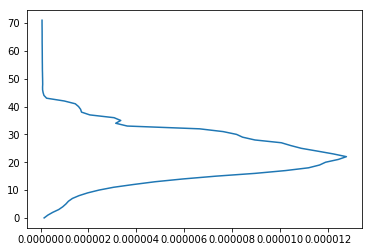

In [184]:
idx = int(np.random.random()*n)
idy = int(np.random.random()*p)
print(idx,idy)
plt.plot((x["o3"][0,:,idy,idx]).T,np.arange(72))
#plt.plot((x["pl"][0,:,idy,idx]).T,np.arange(72));

51 1674


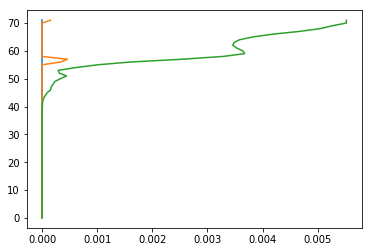

In [321]:
idx = int(np.random.random()*n)
idy = int(np.random.random()*p)
print(idx,idy)

#a=y['flx'][:].mean()
#b=y['flx'][:].std()

plt.plot(x["qi"][0,:,idy,idx].T,np.arange(72));
plt.plot(x["ql"][0,:,idy,idx].T,np.arange(72));
plt.plot(x["q"][0,:,idy,idx].T,np.arange(72));

In [7]:
d=dict()
d0 = y['flx'][:].std()
for k in x.keys():
    d[k] = x[k][:].std()

In [2]:
cov = []
v1=y['flx'][:].flatten()[-10000:]
for i,k in enumerate(x.keys()):
    if(len(x[k].shape)>3):
        print(k)
        v2=x[k][:].flatten()[-10000:]
        cov.append(np.corrcoef(v1,v2)[0,1])

fcld
o3
pl
q
qi


/home/victor/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/victor/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


ql
ri
rl
t


In [6]:
v2=x['qi'][:].flatten()[-10000:]
print(np.max(v2), np.min(v2))

0.0 0.0


In [26]:
cov

[array([[ 1., nan],
        [nan, nan]]), array([[1.        , 0.25222993],
        [0.25222993, 1.        ]]), array([[ 1., nan],
        [nan, nan]]), array([[1.        , 0.21080508],
        [0.21080508, 1.        ]]), array([[ 1., nan],
        [nan, nan]]), array([[ 1., nan],
        [nan, nan]]), array([[ 1., nan],
        [nan, nan]]), array([[ 1., nan],
        [nan, nan]]), array([[ 1.        , -0.16588551],
        [-0.16588551,  1.        ]])]

In [157]:
f=plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

def plotvar(x, var):
    t = x[var][0].T #Transposed for easier unpacking
    y0 = np.arange(n)
    x0 = np.arange(p)

    nrows, ncols = n, p
    grid = t#temp.reshape((nrows, ncols))

    plt.imshow(grid, extent=(x0.min(), x0.max(), y0.max(), y0.min()),
               interpolation='nearest', cmap=cm.gist_rainbow)

<Figure size 640x480 with 0 Axes>

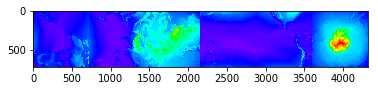

In [165]:
plotvar(x, 'ts');

In [166]:
np.min(x['o3'])

5.5356675e-09

In [263]:
x['ql']

<class 'netCDF4._netCDF4.Variable'>
float32 ql(time, lev, Ydim, Xdim)
    long_name: in_cloud_cloud_liquid_for_radiation
    units: kg kg-1
    _FillValue: 1000000000000000.0
    missing_value: 1000000000000000.0
    fmissing_value: 1000000000000000.0
    scale_factor: 1.0
    add_offset: 0.0
    standard_name: in_cloud_cloud_liquid_for_radiation
    vmin: -1000000000000000.0
    vmax: 1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
    coordinates: lons lats
unlimited dimensions: time
current shape = (1, 72, 4320, 720)
filling on

In [265]:
for k in x.keys():
    print(k, np.max(x[k]), np.min(x[k]))

Xdim 720.0 1.0
Ydim 4320.0 1.0
lons 359.999755859375 0.0014086166629567742
lats 89.90309143066406 -89.90309143066406
lev 72.0 1.0
time 0 0
emis 0.9999901 0.94119996
fcld 1.0 0.0
o3 4.780252e-05 5.5356675e-09
pl 102838.984 1.5000001
q 0.023239478 5.5362413e-31
qi 0.001 0.0
ql 0.001 0.0
ri 0.00010348039 1.5e-05
rl 2.1e-05 5e-06
t 311.14618 157.13957
ts 323.24152 196.08252


In [316]:
for k in x.keys():
    print( "{} : {}".format(k ,x[k].long_name))

Xdim : Fake Longitude for GrADS Compatibility
Ydim : Fake Latitude for GrADS Compatibility
lons : longitude
lats : latitude
lev : vertical level
time : time
emis : surface_emissivity
fcld : cloud_fraction_for_radiation
o3 : ozone_mass_mixing_ratio
pl : mid_level_pressure
q : specific_humidity
qi : in_cloud_cloud_ice_for_radiation
ql : in_cloud_cloud_liquid_for_radiation
ri : ice_phase_cloud_particle_effective_radius
rl : liquid_cloud_particle_effective_radius
t : air_temperature
ts : surface_skin_temperature
